# NBA SHOTS classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

First we import our data set and print it 

In [127]:
df = pd.read_csv(r"D:\dataFrames\shot_logs.csv")
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


We then want to check if we have any NaN to see how we deal with them 

In [128]:
df.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

We can see that all of our NaN are in the SHOT_CLOCK column so we will change it to 0 cause there was no time left on the clock 

In [129]:
df = df.fillna(0)
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

Let us get the data information

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

For classification we need a binary value so we will replace missed shots with 0 and made shots with 1

In [131]:
df = df.replace(["missed","made"],[0,1])
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0.0,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

Deleting all the columns that are not usefull when trying to determine whether a shot went in or not

In [133]:
df = df.drop(columns = ["SHOT_NUMBER","MATCHUP","player_name" ,"player_id", "CLOSEST_DEFENDER","CLOSEST_DEFENDER_PLAYER_ID", "W", "FINAL_MARGIN"])
df.head()

,GAME_ID,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
0,21400899,A,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1,2
1,21400899,A,1,0:14,3.4,0,0.8,28.2,3,0,6.1,0,0
2,21400899,A,1,0:00,0.0,3,2.7,10.1,2,0,0.9,0,0
3,21400899,A,2,11:47,10.3,2,1.9,17.2,2,0,3.4,0,0
4,21400899,A,2,10:34,10.9,2,2.7,3.7,2,0,1.1,0,0


In [134]:
df.describe()

,GAME_ID,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,11.912012,2.023355,2.765901,13.571504,2.264670,0.452139,4.123015,0.452139,0.997314
std,2.578773e+02,1.139919,6.182215,3.477760,3.043682,8.888964,0.441159,0.497706,2.756446,0.497706,1.130978
min,2.140000e+07,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,1.000000,7.500000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000,0.000000,0.000000
50%,2.140045e+07,2.000000,12.000000,1.000000,1.600000,13.700000,2.000000,0.000000,3.700000,0.000000,0.000000
75%,2.140067e+07,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,5.300000,1.000000,2.000000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,53.200000,1.000000,3.000000


we can see that the Touch_time column has a min value that is negative which is not possible

In [135]:
negative = df.loc[df["TOUCH_TIME"]<0]
negative.shape

(312, 13)

In [136]:
#we can see that we have 312 values that are negative, we will assign touch_time.mean() for the negative values
change_to = df.TOUCH_TIME.mean()
df.loc[(df.TOUCH_TIME < 0),'TOUCH_TIME'] = change_to
df.head()

,GAME_ID,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
0,21400899,A,1,1:09,10.8,2,1.9,7.7,2,1,1.3,1,2
1,21400899,A,1,0:14,3.4,0,0.8,28.2,3,0,6.1,0,0
2,21400899,A,1,0:00,0.0,3,2.7,10.1,2,0,0.9,0,0
3,21400899,A,2,11:47,10.3,2,1.9,17.2,2,0,3.4,0,0
4,21400899,A,2,10:34,10.9,2,2.7,3.7,2,0,1.1,0,0


In [137]:
df.describe()

,GAME_ID,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,11.912012,2.023355,2.778696,13.571504,2.264670,0.452139,4.123015,0.452139,0.997314
std,2.578773e+02,1.139919,6.182215,3.477760,2.983555,8.888964,0.441159,0.497706,2.756446,0.497706,1.130978
min,2.140000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,1.000000,7.500000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000,0.000000,0.000000
50%,2.140045e+07,2.000000,12.000000,1.000000,1.600000,13.700000,2.000000,0.000000,3.700000,0.000000,0.000000
75%,2.140067e+07,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,5.300000,1.000000,2.000000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,53.200000,1.000000,3.000000


we will draw some stats to see if maybe we can drop a certin column

In [138]:
shots_home = df.loc[df["LOCATION"] == "H"]
shots_away = df.loc[df["LOCATION"] == "A"]
shots_home_made = shots_home.loc[shots_home["SHOT_RESULT"] == 1]
shots_away_made = shots_away.loc[shots_away["SHOT_RESULT"] == 1]
home_precentge = (shots_home_made.shape[0])/ shots_home.shape[0]
away_precentge = (shots_away_made.shape[0])/ shots_away.shape[0]
print(home_precentge)
print(away_precentge)
difference = abs(home_precentge - away_precentge)
print(difference)

0.45617355397753934
0.4481172526701489
0.008056301307390434


as we see there is not alot of difference between home and away games so we will drop this column ,
we will check the same for other columns that have a set number of options(period, shot type)

In [139]:
df = df.drop(columns = ["LOCATION"])
first_q = df.loc[df['PERIOD'] == 1]
second_q = df.loc[df['PERIOD'] == 2]
third_q = df.loc[df['PERIOD'] == 3]
fourth_q = df.loc[df['PERIOD'] == 4]
OT = df.loc[df['PERIOD'] == 5]
first_q_made = first_q.loc[first_q['SHOT_RESULT'] == 1]
second_q_made = second_q.loc[second_q['SHOT_RESULT'] == 1]
third_q_made = third_q.loc[third_q['SHOT_RESULT'] == 1]
fourth_q_made  = fourth_q .loc[fourth_q ['SHOT_RESULT'] == 1]
OT_made = OT.loc[OT['SHOT_RESULT'] == 1]
first_precentge = (first_q_made.shape[0])/(first_q.shape[0])
second_precentge = (second_q_made.shape[0])/(second_q.shape[0])
third_precentge = (third_q_made.shape[0])/(third_q.shape[0])
fourth_precentge = (fourth_q_made.shape[0])/(fourth_q.shape[0])
OT_precentge = (OT_made.shape[0])/(OT.shape[0])
print(first_precentge)
print(second_precentge)
print(third_precentge)
print(fourth_precentge)
print(OT_precentge)

0.46052825299608374
0.4511073899718808
0.45714197013442615
0.4400988909109638
0.39035087719298245


as we can see, there is a big drop in the shooting precentge the later into the game it was shot, so we will keep those columns

In [140]:
two_pointers = df.loc[df['PTS_TYPE'] == 2]
three_pointers = df.loc[df['PTS_TYPE'] == 3]
two_pointers_made = two_pointers.loc[two_pointers['SHOT_RESULT'] == 1]
three_pointers_made = three_pointers.loc[three_pointers['SHOT_RESULT'] == 1]
twos_precentege =(two_pointers_made.shape[0])/(two_pointers.shape[0]) 
threes_precentege =(three_pointers_made.shape[0])/(three_pointers.shape[0]) 
print(twos_precentege)
print(threes_precentege)

0.48835653531266926
0.3515164031154118


there is a huge diffrence between 3 point % and 2 point % so we wont drop those columns either

from what i have read, a player is defined as closely guarded when there is a defender which is less the 6 feet away from him, so we will change data acordibgly, if a player shoots while he is closely guarded we will classify that as 1, and if he is not closely guarded we will classify it as 0, and rename it accordingly

In [141]:
df.loc[(df.CLOSE_DEF_DIST < 6),'CLOSE_DEF_DIST']= int(1)
df.loc[(df.CLOSE_DEF_DIST >= 6),'CLOSE_DEF_DIST']= int(0)
df = df.rename(columns = {"CLOSE_DEF_DIST": "CLOSELY_GUARDED"})
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,FGM,PTS
0,21400899,1,1:09,10.8,2,1.9,7.7,2,1,1.0,1,2
1,21400899,1,0:14,3.4,0,0.8,28.2,3,0,0.0,0,0
2,21400899,1,0:00,0.0,3,2.7,10.1,2,0,1.0,0,0
3,21400899,2,11:47,10.3,2,1.9,17.2,2,0,1.0,0,0
4,21400899,2,10:34,10.9,2,2.7,3.7,2,0,1.0,0,0


next lets check about the time left on the shot clock which goes down from 24 seconds in the nba, according to the internet, you should split it into 4 categories, 0-3 seconds left, 4-8 second left, 9-13 seconds left, 14+ second left

In [142]:
quick_possessions =  df.loc[df['SHOT_CLOCK'] >= 14] # 14+ seconds left
medium_possessions =  df.loc[(df['SHOT_CLOCK'] < 14) &(df['SHOT_CLOCK'] >= 9)] # 9-13 seconds left
slow_possessions =  df.loc[(df['SHOT_CLOCK'] < 9) &(df['SHOT_CLOCK'] >= 4)] # 4-8 seconds left
late_possessions =  df.loc[df['SHOT_CLOCK'] < 4] # 0-3 seconds left
quick_possessions_made = quick_possessions.loc[quick_possessions["SHOT_RESULT"] == 1]
medium_possessions_made = medium_possessions.loc[medium_possessions["SHOT_RESULT"] == 1]
slow_possessions_made = slow_possessions.loc[slow_possessions["SHOT_RESULT"] == 1]
late_possessions_made = late_possessions.loc[late_possessions["SHOT_RESULT"] == 1]
quick_percentge = quick_possessions_made.shape[0]/quick_possessions.shape[0]
medium_percentge = medium_possessions_made.shape[0]/medium_possessions.shape[0]
slow_percentge = slow_possessions_made.shape[0]/slow_possessions.shape[0]
late_percentge = late_possessions_made.shape[0]/late_possessions.shape[0]
print(quick_percentge)
print(medium_percentge)
print(slow_percentge)
print(late_percentge)

0.4975447747509118
0.4473677307662041
0.42660691028882247
0.3586477880902378


as we see there is a difference between the time on the shot clock left when shooting, so we will keep it, and change it from the second to 1,2,3,4 according to how we split it before

In [143]:
df.loc[(df['SHOT_CLOCK'] < 4),'SHOT_CLOCK'] = 4
df.loc[(df['SHOT_CLOCK'] >= 14),'SHOT_CLOCK'] = 1
df.loc[((df['SHOT_CLOCK'] < 14) & (df['SHOT_CLOCK'] >= 9)),'SHOT_CLOCK'] = 2
df.loc[((df['SHOT_CLOCK'] < 9) & (df['SHOT_CLOCK'] >= 4)),'SHOT_CLOCK'] = 3
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,FGM,PTS
0,21400899,1,1:09,2.0,2,1.9,7.7,2,1,1.0,1,2
1,21400899,1,0:14,3.0,0,0.8,28.2,3,0,0.0,0,0
2,21400899,1,0:00,3.0,3,2.7,10.1,2,0,1.0,0,0
3,21400899,2,11:47,2.0,2,1.9,17.2,2,0,1.0,0,0
4,21400899,2,10:34,2.0,2,2.7,3.7,2,0,1.0,0,0


In [144]:
#we will change the GAME_CLOCK columng to time in second so we will be able to use it as well
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,FGM,PTS
0,21400899,1,69,2.0,2,1.9,7.7,2,1,1.0,1,2
1,21400899,1,14,3.0,0,0.8,28.2,3,0,0.0,0,0
2,21400899,1,0,3.0,3,2.7,10.1,2,0,1.0,0,0
3,21400899,2,707,2.0,2,1.9,17.2,2,0,1.0,0,0
4,21400899,2,634,2.0,2,2.7,3.7,2,0,1.0,0,0


next we will split to shots according to distance from the basket (SHOT_DIST column)

we have 5 categories: 

1. close range shots (0-5 ft from basket)
2. short two's (6-11 ft from basket)
3. mid range (12-17 ft from basket)
4. long two's (18- 23 ft from the basket)
5. three pointers(23+ from the basket)

we can not count the three pointers because we know what is a 3 or not according to the PTS_TYPE column
we will also change the column name from SHOT_DIST to SHOT_TYPE

In [145]:
df.loc[(df['SHOT_DIST'] <= 5),'SHOT_DIST'] = 1
df.loc[((df['SHOT_DIST'] > 5) & (df['SHOT_DIST'] <= 11)),'SHOT_DIST'] =2
df.loc[((df['SHOT_DIST'] > 11) & (df['SHOT_DIST'] <= 17)),'SHOT_DIST'] = 3
df.loc[((df['SHOT_DIST'] > 17) & (df['SHOT_DIST'] <= 23)),'SHOT_DIST'] = 4
df.loc[(df['PTS_TYPE'] == 3),'SHOT_DIST'] = 5
df = df.rename(columns = {"SHOT_DIST": "SHOT_TYPE"})
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_TYPE,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,FGM,PTS
0,21400899,1,69,2.0,2,1.9,2.0,2,1,1.0,1,2
1,21400899,1,14,3.0,0,0.8,5.0,3,0,0.0,0,0
2,21400899,1,0,3.0,3,2.7,2.0,2,0,1.0,0,0
3,21400899,2,707,2.0,2,1.9,4.0,2,0,1.0,0,0
4,21400899,2,634,2.0,2,2.7,1.0,2,0,1.0,0,0


last change we will do is change the PTS_TYPE to 3PT and if it is a 3 pointer we will assign 1 and if it is not we will assigan 0, and remove the FGM and PTS columns

In [146]:
df.loc[(df['PTS_TYPE'] == 3),'PTS_TYPE'] = 1
df.loc[(df['PTS_TYPE'] == 2),'PTS_TYPE'] = 0
df = df.rename(columns = {"PTS_TYPE": "THREE_PT"})
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_TYPE,THREE_PT,SHOT_RESULT,CLOSELY_GUARDED,FGM,PTS
0,21400899,1,69,2.0,2,1.9,2.0,0,1,1.0,1,2
1,21400899,1,14,3.0,0,0.8,5.0,1,0,0.0,0,0
2,21400899,1,0,3.0,3,2.7,2.0,0,0,1.0,0,0
3,21400899,2,707,2.0,2,1.9,4.0,0,0,1.0,0,0
4,21400899,2,634,2.0,2,2.7,1.0,0,0,1.0,0,0


now we will get our data ready to use in the clasifer, first we need to get our target array

In [147]:
target = df.SHOT_RESULT
print(target)
print(type(target))
target = target.to_numpy()
print(target)
print(type(target))

0         1
1         0
2         0
3         0
4         0
         ..
128064    0
128065    1
128066    1
128067    0
128068    1
Name: SHOT_RESULT, Length: 128069, dtype: int64
<class 'pandas.core.series.Series'>
[1 0 0 ... 1 0 1]
<class 'numpy.ndarray'>


remove last columns and Shot_Result columns since it is what we are predicting and game id column

In [148]:
df = df.drop(columns = ["GAME_ID","SHOT_RESULT","FGM","PTS"])
df.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_TYPE,THREE_PT,CLOSELY_GUARDED
0,1,69,2.0,2,1.9,2.0,0,1.0
1,1,14,3.0,0,0.8,5.0,1,0.0
2,1,0,3.0,3,2.7,2.0,0,1.0
3,2,707,2.0,2,1.9,4.0,0,1.0
4,2,634,2.0,2,2.7,1.0,0,1.0


now we need to set an array of arrays that will hold our data for each shot

In [150]:
data = np.zeros((df.shape[0],8))
for i in range(len(data)):
    data[i][0] = df.loc[i].PERIOD
    data[i][1] = df.loc[i].GAME_CLOCK
    data[i][2] = df.loc[i].SHOT_CLOCK
    data[i][3] = df.loc[i].DRIBBLES
    data[i][4] = df.loc[i].TOUCH_TIME
    data[i][5] = df.loc[i].SHOT_TYPE
    data[i][6] = df.loc[i].THREE_PT
    data[i][7] = df.loc[i].CLOSELY_GUARDED
    

In [152]:
data[1234]

array([  4. , 127. ,   3. ,   1. ,   3.4,   1. ,   0. ,   1. ])

In [1]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

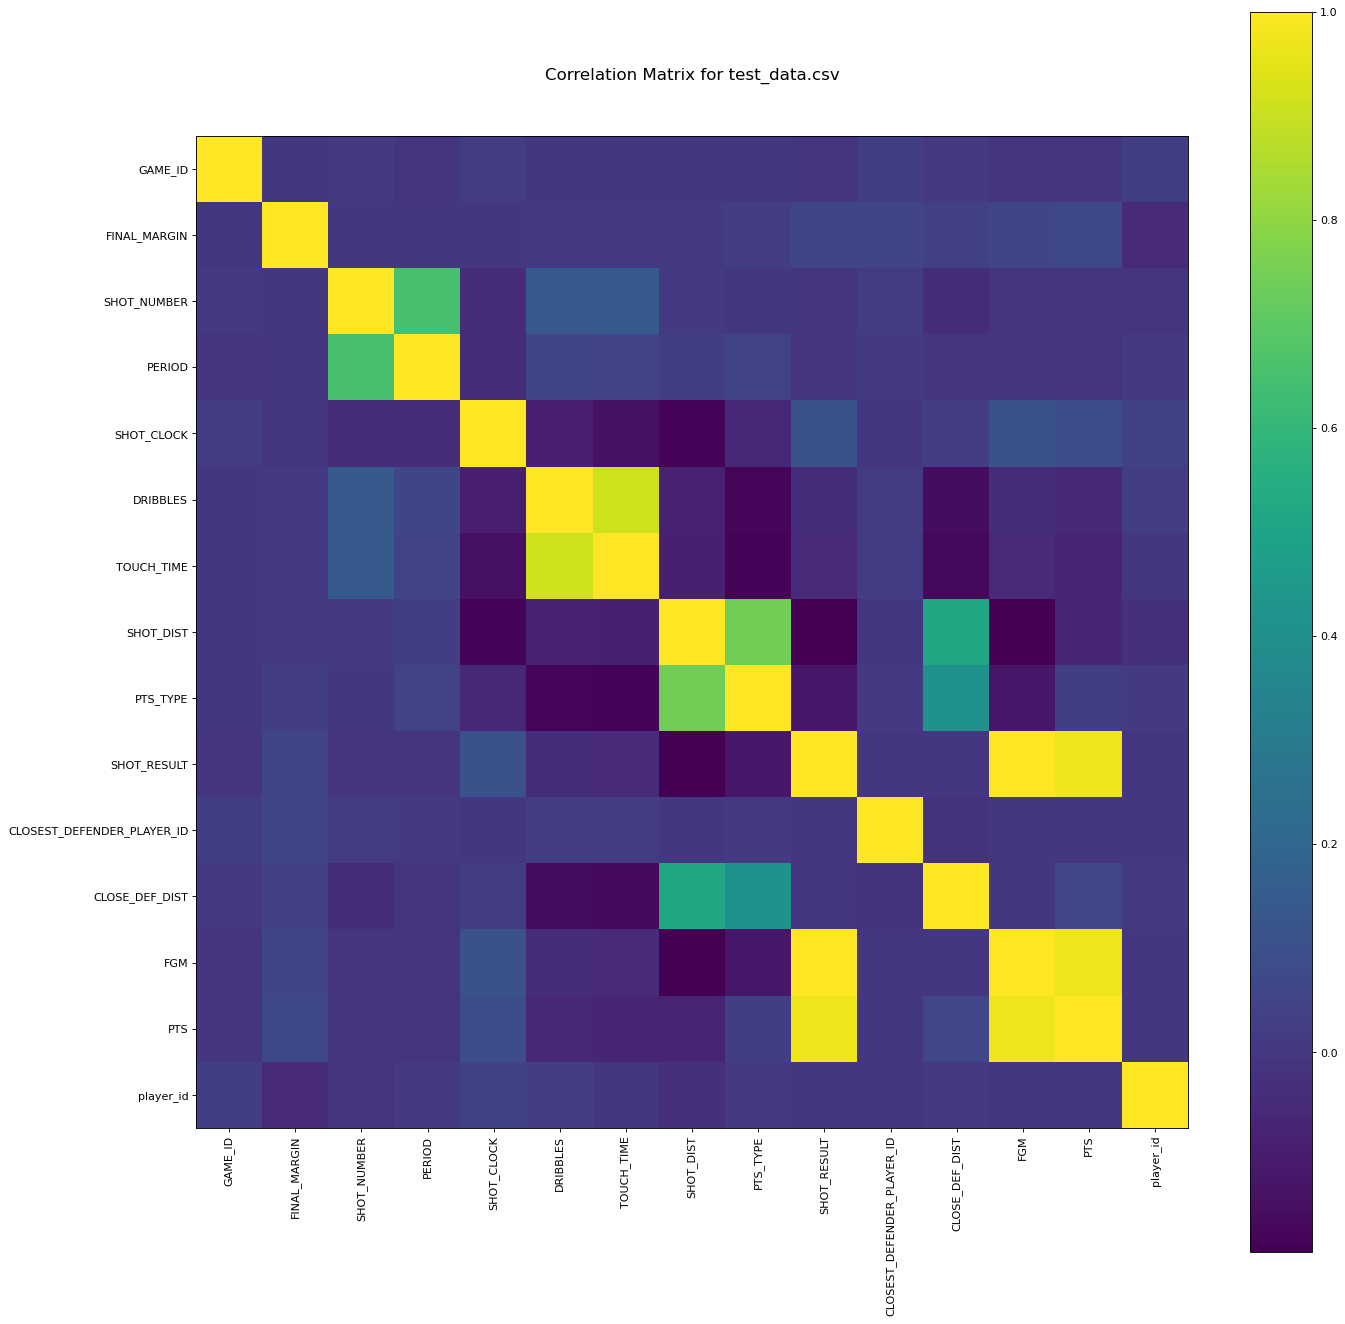

In [39]:
changesResult.dataframeName = 'test_data.csv'
plotCorrelationMatrix(changesResult, 20)